In [6]:
# Cell 1: Imports, Data Loading, and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# --- 1. LOAD DATA ---
# Ensure 'heart.csv' is in the same folder as this new notebook
df = pd.read_csv('heart.csv')

In [8]:
# --- 2. DATA PREPROCESSING (Must match your previous model) ---

# Separate Features and Target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# One-Hot Encoding for categorical variables (Sex, ChestPainType, etc.)
X = pd.get_dummies(X, drop_first=True)

# Stratified Split (80/20) - ensuring fair comparison with previous model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
# Note: Random Forest doesn't technically require scaling, but applying it 
# ensures the input data is IDENTICAL to your Logistic Regression experiment.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed successfully.")
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Data loaded and preprocessed successfully.
Training Data Shape: (734, 15)
Testing Data Shape: (184, 15)


In [ ]:
# --- 3. TRAIN RANDOM FOREST MODEL ---

# Initialize Random Forest
# n_estimators=100 uses 100 trees
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC


--- Random Forest Performance Metrics ---


,precision,recall,f1-score,support
Normal (0),0.862500,0.841463,0.851852,82.000000
Heart Disease (1),0.875000,0.892157,0.883495,102.000000
accuracy,0.869565,0.869565,0.869565,0.869565
macro avg,0.868750,0.866810,0.867673,184.000000
weighted avg,0.869429,0.869565,0.869393,184.000000


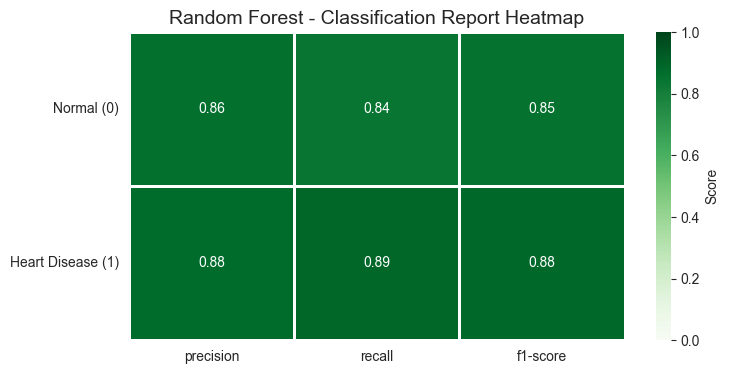

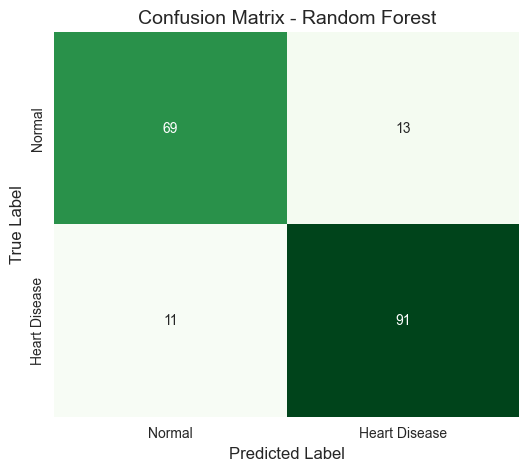

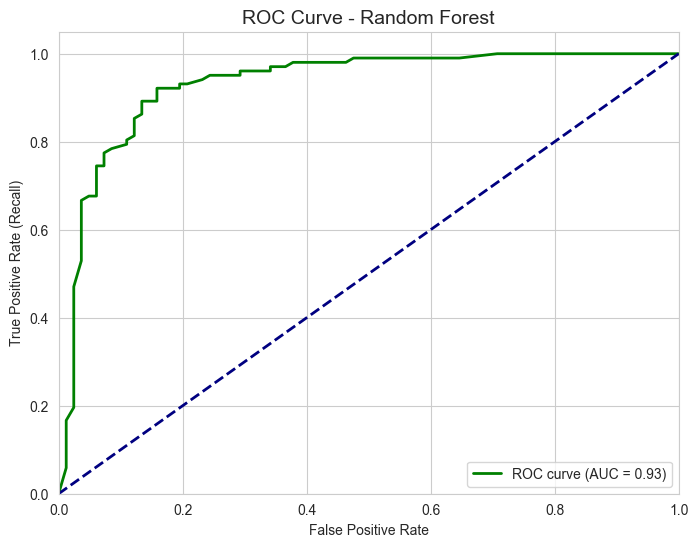

/var/folders/s7/jxy5nj_92ms19pmy88kw45zm0000gn/T/ipykernel_21246/2633314239.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')


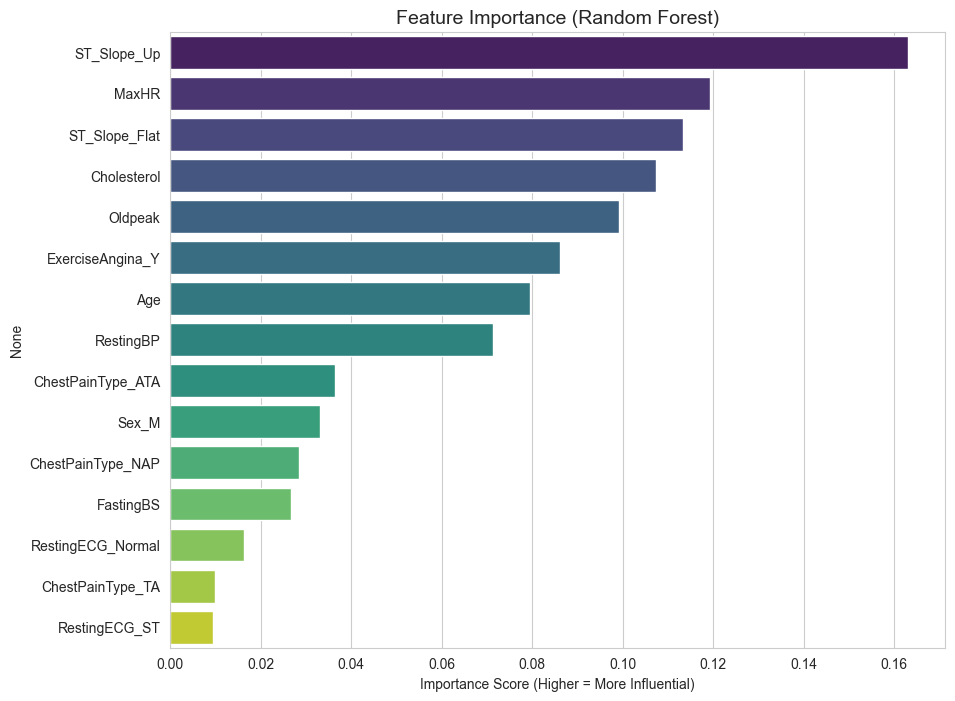

In [10]:
# --- 4. RESULTS & VISUALIZATION ---

# A. Human Readable Classification Report (Heatmap)
report_dict_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf).transpose()

# Rename rows for clarity
report_df_rf.rename(index={'0': 'Normal (0)', '1': 'Heart Disease (1)'}, inplace=True)

print("\n--- Random Forest Performance Metrics ---")
display(report_df_rf)

# Heatmap of metrics
heatmap_data_rf = report_df_rf.drop(['accuracy', 'macro avg', 'weighted avg'])
heatmap_data_rf = heatmap_data_rf.drop('support', axis=1)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data_rf, annot=True, cmap='Greens', fmt='.2f',
            vmin=0, vmax=1, linewidths=1, cbar_kws={'label': 'Score'})
plt.title('Random Forest - Classification Report Heatmap', fontsize=14)
plt.yticks(rotation=0)
plt.show()

# B. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.show()

# C. ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# D. Feature Importance
# Shows which features heavily influenced the Random Forest decisions
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance Score (Higher = More Influential)')
plt.show()